<a href="https://colab.research.google.com/github/kermi1311/calculator-java-/blob/main/Usl_project_clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loadinf data


In [1]:
!pip install isbnlib
!pip install newspaper3k
!pip install goodreads_api_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 2.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13552 sha256=6a1831f50f983dbce619c0eea993d18f40ec89fcf238d1926b86a506e0264d6a
  Stored in directory: /root/.cache/pip/wheels/94/ad/df/a2a01300cea47d5695f2

In [125]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import isbnlib
from newspaper import Article
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from tqdm import tqdm
from progressbar import ProgressBar
import re
from scipy.cluster.vq import kmeans, vq
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import goodreads_api_client as gr
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [92]:
books = pd.read_csv('//content/books.csv', error_bad_lines = False)

Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



In [33]:
books.index = books['bookID']

In [34]:
#Finding Number of rows and columns
print("Dataset contains {} rows and {} columns".format(books.shape[0], books.shape[1]))

Dataset contains 11123 rows and 12 columns


In [36]:
books

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,,
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
45631,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
45633,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
45634,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books


Columns Description:
- bookID Contains the unique ID for each book/series
- title contains the titles of the books
- authors contains the author of the particular book
- average_rating the average rating of the books, as decided by the users
- ISBN ISBN(10) number, tells the information about a book  such as edition and publisher
- ISBN 13 The new format for ISBN, implemented in 2007. 13 digits
- language_code Tells the language for the books
- Num_pages Contains the number of pages for the book
- Ratings_count Contains the number of ratings given for the book
- text_reviews_count Has the count of reviews left by users

# EDA

Most occuring books

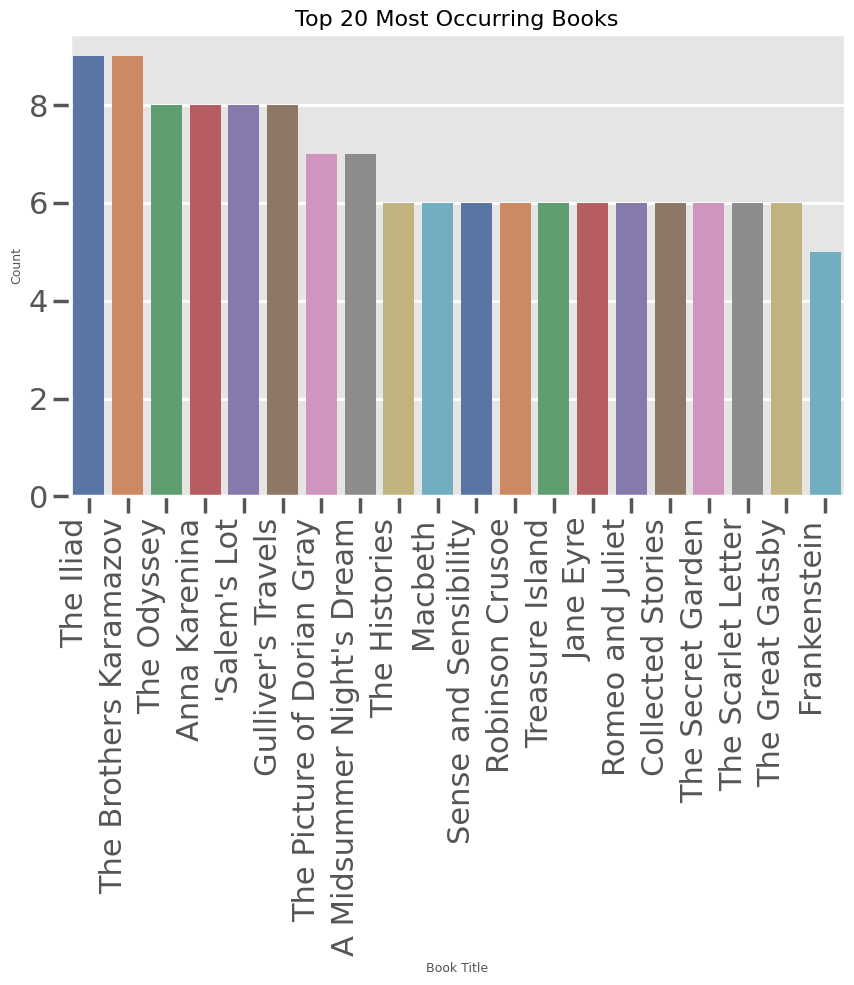

In [48]:
# Get the top 20 most occurring books
top_books = books['title'].value_counts().head(20)

# Create a bar plot of the top 10 books
plt.figure(figsize=(10, 6))
sns.barplot(x=top_books.index, y=top_books.values, palette='deep')
plt.title('Top 20 Most Occurring Books', fontsize=16)
plt.xlabel('Book Title', fontsize=9)
plt.xticks(rotation=90, ha='right')
plt.ylabel('Count', fontsize=9)
plt.show()

most occuring authors


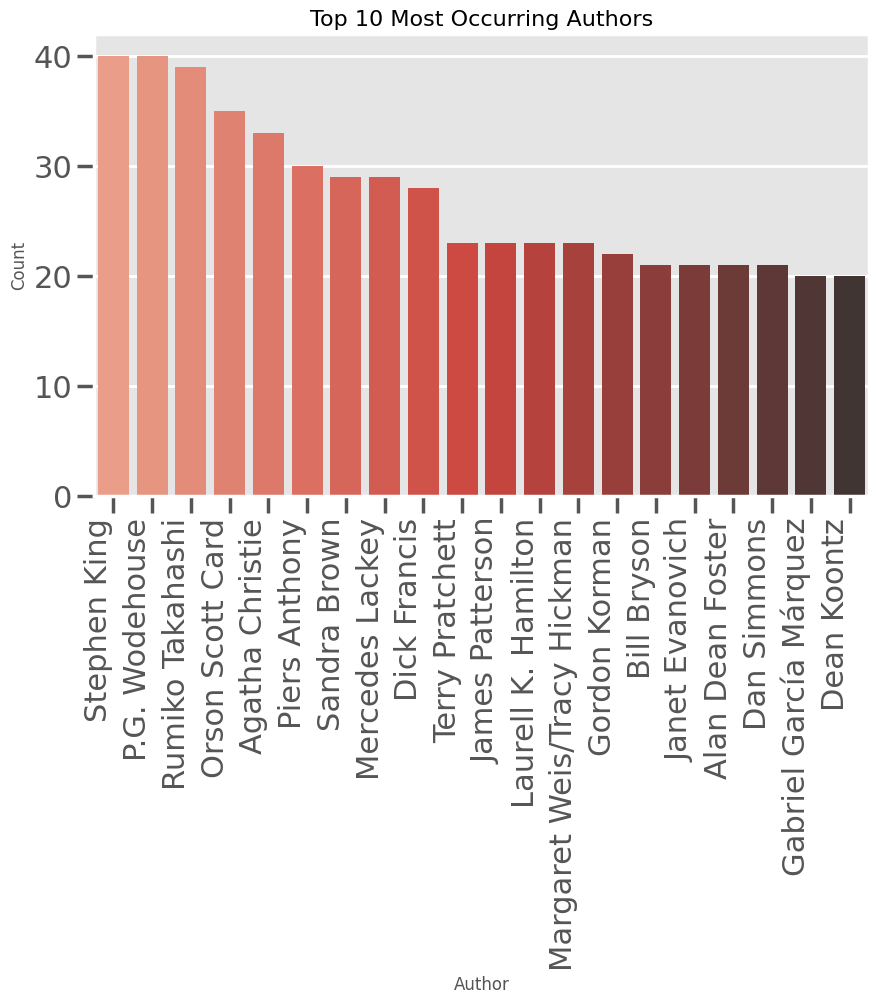

In [49]:
# Get the top 20 most occurring authors
top_authors = books['authors'].value_counts().head(20)

# Create a bar plot of the top 20 authors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.index, y=top_authors.values, palette='Reds_d')
plt.title('Top 10 Most Occurring Authors', fontsize=16)
plt.xlabel('Author', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.ylabel('Count', fontsize=12)
plt.show()


What is the distribution of books for all languages?

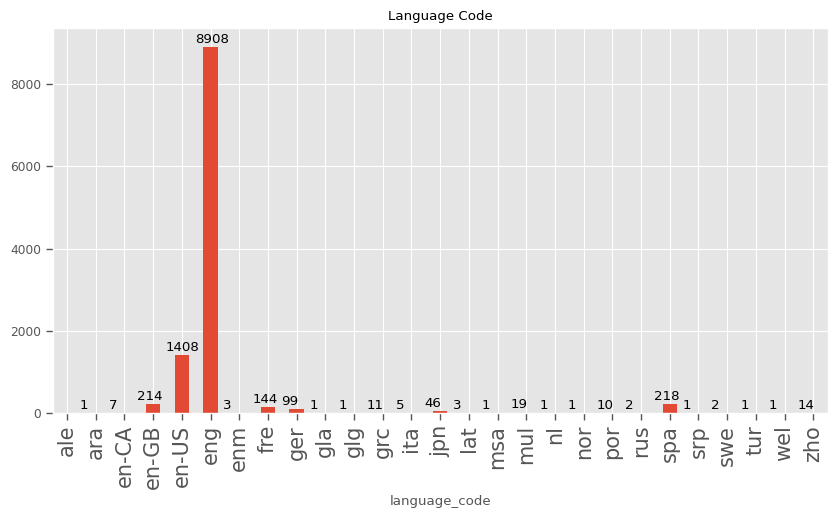

In [53]:
sns.set_context('paper')
plt.figure(figsize=(10,5))
ax = books.groupby('language_code')['title'].count().plot.bar()
plt.title('Language Code')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))

top 10 rated books

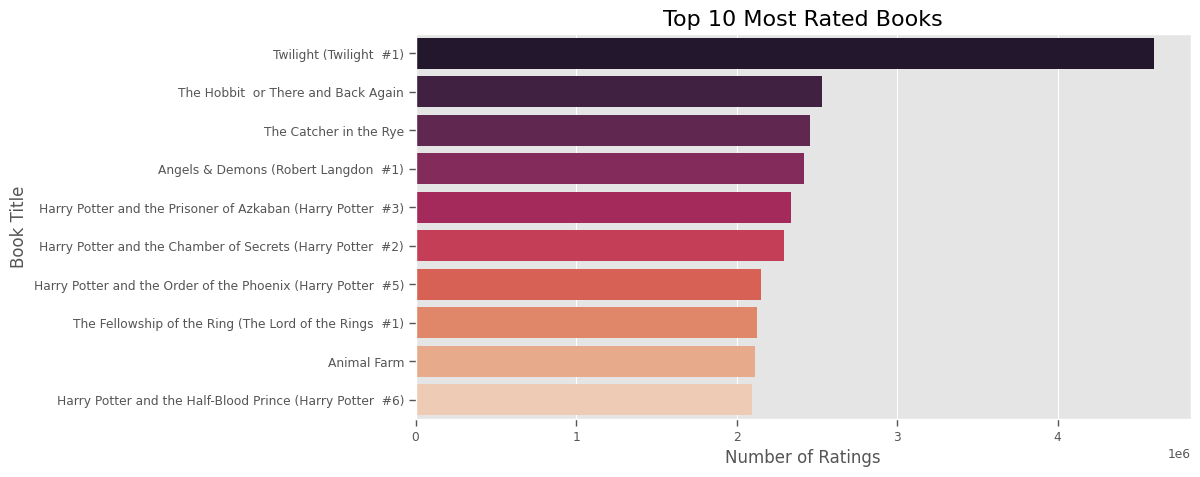

In [57]:
most_rated = books.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(10, 5))
sns.barplot(x='ratings_count', y=most_rated.index, data=most_rated, palette='rocket')
plt.title('Top 10 Most Rated Books', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Book Title', fontsize=12)
plt.show()

Is there any relationship between ratings and review counts?

<Figure size 1500x1000 with 0 Axes>

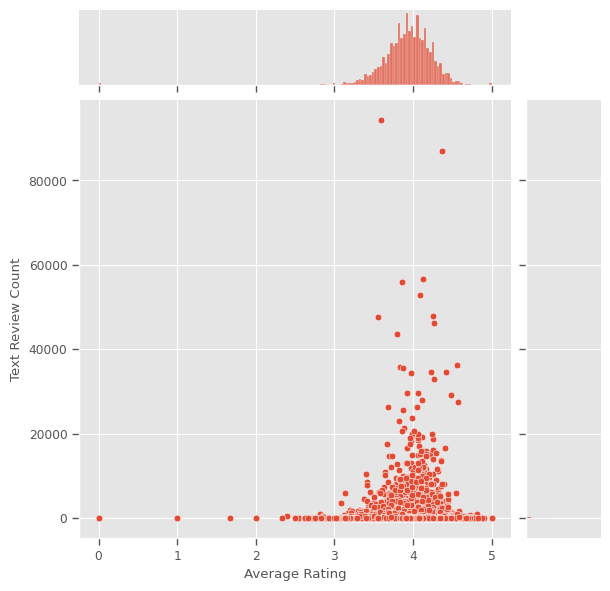

In [59]:
#Checking for any relation between them.
plt.figure(figsize=(15,10))
books.dropna(0, inplace=True)
sns.set_context('paper')
ax =sns.jointplot(x="average_rating",y='text_reviews_count', kind='scatter',  data= books[['text_reviews_count', 'average_rating']])
ax.set_axis_labels("Average Rating", "Text Review Count")
plt.show()

Analysis: We can infer from the plot that most of the ratings for the books seems to lie near 3-4, with a heavy amount of reviews lying barely near 5000, approximately. 

In [65]:
books

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,,
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
45631,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
45633,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
45634,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books


# K means 
With this, we attepmt to find a relationship or groups between the rating count and average rating value.

Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



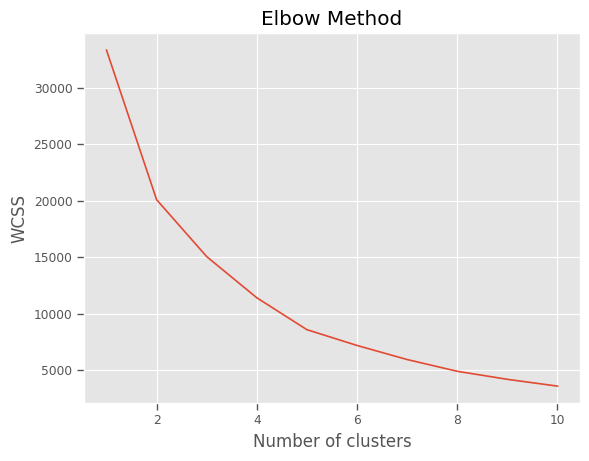

Number of clusters: 3
Silhouette Score: 0.4391208335438039
2    6957
0    4128
1      38
Name: cluster, dtype: int64


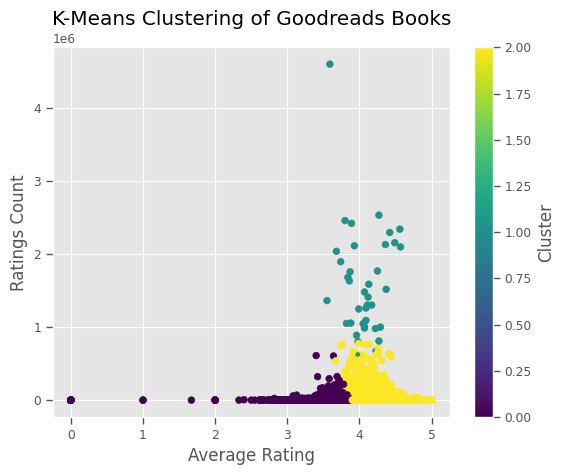

In [135]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
books = pd.read_csv('books.csv', error_bad_lines=False)

# Select relevant features
X = books[['average_rating', 'ratings_count', 'text_reviews_count']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Get the labels and number of clusters
labels = kmeans.labels_
n_clusters = len(set(labels))
print('Number of clusters:', n_clusters)

# Compute the silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)
print('Silhouette Score:', silhouette_avg)

# Add the cluster labels to the original dataset
books['cluster'] = labels

# Print the number of books in each cluster
print(books['cluster'].value_counts())

# Scatter plot of books with cluster labels as color
plt.scatter(books['average_rating'], books['ratings_count'], c=books['cluster'], cmap='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Ratings Count')
plt.title('K-Means Clustering of Goodreads Books')
plt.colorbar(label='Cluster')
plt.show()

the x-axis represents the average rating of the books, and the y-axis represents the number of ratings. Each point in the plot represents a book, and the color of the point represents the cluster to which the book belongs.

The plot shows that books in different clusters have different ranges of average ratings and number of ratings. Cluster 1 (represented by the color blue) contains books with lower average ratings and lower numbers of ratings. Cluster 2 (represented by the color green) contains books with higher average ratings and higher numbers of ratings. Cluster 0 (represented by the color purple) contains books with a wide range of average ratings and numbers of ratings.

The plot suggests that the K-means clustering algorithm has identified meaningful clusters in the data, based on the characteristics of the books' ratings.

t shows a scatter plot of books with cluster labels as colors, where the x-axis represents the average rating of the books, the y-axis represents the ratings count of the books, and the color represents the cluster assignment.

The inference from the plot can be as follows:

Cluster assignments: The plot shows the books segmented into different clusters based on their average rating and ratings count. The books are color-coded based on their cluster assignments, which are determined by the K-means clustering algorithm. Each cluster represents a group of books that are similar in terms of their average rating and ratings count.
Cluster characteristics: The plot can provide insights into the characteristics of the books in each cluster. Books belonging to the same cluster are expected to have similar values of average rating and ratings count. The distribution and spread of books within each cluster can provide information about the variability of these characteristics within the cluster.
Cluster separation: The plot can also give an indication of how well the K-means algorithm has separated the books into different clusters. If the books within each cluster are tightly packed and well-separated from books in other clusters, it suggests that the clustering algorithm has performed well in segregating books with similar characteristics into distinct clusters.

# DBscan


In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(books)

In [118]:
books = pd.read_csv('//content/books.csv', error_bad_lines = False)

Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



Number of clusters: 5
 0    10944
-1      138
 1       25
 2        6
 3        6
 4        4
Name: cluster, dtype: int64


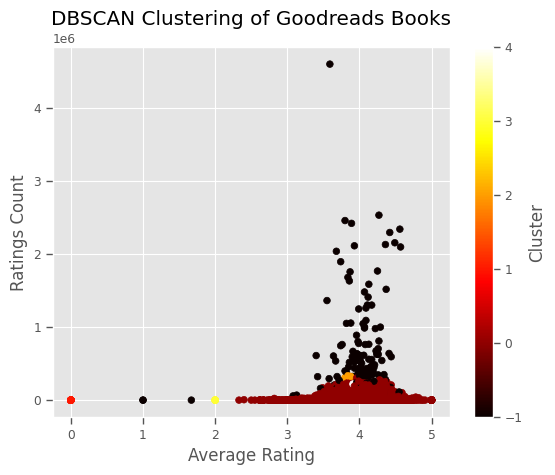

In [138]:
# Select relevant features
X = books[['average_rating', 'ratings_count', 'text_reviews_count']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

# Get the labels and number of clusters
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print('Number of clusters:', n_clusters)

# Add the cluster labels to the original dataset
books['cluster'] = labels

# Print the number of books in each cluster
print(books['cluster'].value_counts())

# Scatter plot of books with cluster labels as color
plt.scatter(books['average_rating'], books['ratings_count'], c=books['cluster'], cmap='hot')
plt.xlabel('Average Rating')
plt.ylabel('Ratings Count')
plt.title('DBSCAN Clustering of Goodreads Books')
plt.colorbar(label='Cluster')
plt.show()

In [131]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)
print('Silhouette Score of DBScan:', silhouette_avg)

Silhouette Score of DBScan: 0.7110366731854822


The plot shows that there are a few highly rated books with a large number of ratings, represented by points on the top right of the plot. These books are likely to be the most popular books in the dataset.
The majority of the books have an average rating between 3 and 4 and a lower number of ratings. These books are less popular than the highly rated books, but still have a significant number of ratings.
The cluster labels assigned by DBSCAN group books with similar characteristics together. Points with the same color indicate that they are part of the same cluster. In this plot, the number of clusters is not specified, but they can be inferred from the different colors present in the plot.
Outliers or noise points, which are assigned the label -1 by DBSCAN, are shown as scattered points with no distinct cluster. These points have a low density and are located far away from the other points in the plot.
The shape and boundaries of the clusters can provide insights into the natural grouping or distribution of books in the dataset. The distance between points within a cluster may indicate the level of similarity or dissimilarity among books in that cluster.
Overall, this plot provides a visual representation of the clustering results obtained by DBSCAN and helps in understanding the distribution of the books in the dataset based on their average rating and number of ratings. 

# Agglomerative Clustering 

In [132]:
books = pd.read_csv('//content/books.csv', error_bad_lines = False)

Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



Number of clusters: 5
0    8283
2    2712
3      72
1      31
4      25
Name: cluster, dtype: int64


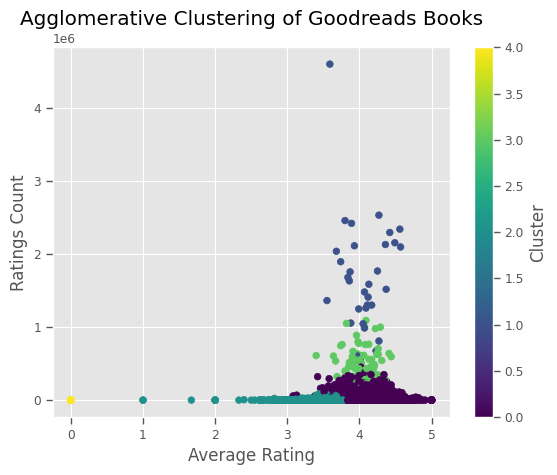

In [133]:
X1 = books[['average_rating', 'ratings_count', 'text_reviews_count']]

# Scale the data
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X)

# Apply agglomerative clustering
agg = AgglomerativeClustering(n_clusters=5)
agg.fit(X1_scaled)

# Get the labels and number of clusters
labels = agg.labels_
n_clusters = len(set(labels))
print('Number of clusters:', n_clusters)

# Add the cluster labels to the original dataset
books['cluster'] = labels

# Print the number of books in each cluster
print(books['cluster'].value_counts())

# Scatter plot of books with cluster labels as color
plt.scatter(books['average_rating'], books['ratings_count'], c=books['cluster'], cmap='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Ratings Count')
plt.title('Agglomerative Clustering of Goodreads Books')
plt.colorbar(label='Cluster')
plt.show()

In [134]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X1_scaled, labels)
print('Silhouette Score of Aglomerative clustering:', silhouette_avg)

Silhouette Score of Aglomerative clustering: 0.45039108922547805


The code performs agglomerative clustering on the Goodreads Books dataset using three features: 'average_rating', 'ratings_count', and 'text_reviews_count'. The scaled data is used for clustering. The number of clusters is set to 5. The labels and the number of clusters are printed. The cluster labels are added to the original dataset. The number of books in each cluster is printed. Finally, a scatter plot is generated with the 'average_rating' and 'ratings_count' features as x and y axes, respectively, and the cluster labels as the color of the data points.

The inference of the plot is that the books in the dataset are clustered into five different groups based on their 'average_rating', 'ratings_count', and 'text_reviews_count' features. Each cluster has a different color. The cluster with the highest number of books is represented by the color blue. The cluster with the second-highest number of books is represented by the color orange. The cluster with the third-highest number of books is represented by the color green. The cluster with the fourth-highest number of books is represented by the color purple. The cluster with the lowest number of books is represented by the color yellow. The plot shows that the books in the dataset are distributed in different regions of the plot, indicating that they have different values for the three features used for clustering.